In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [46]:
def remove_white_border(image):
  original = image.copy()

  # Convert the image to grayscale
  if len(image.shape) == 3:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  else:
    gray = image

  # Apply thresholding to create a binary image
  _, binary = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)

  #Invert the binary image
  binary = cv2.bitwise_not(binary)

  binary = np.uint8(binary)

  contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  if contours:
    x, y, w, h = cv2.boundingRect(contours[0])
    cropped_image = original[y:y+h, x:x+w]
    return cropped_image
  else:
    return original

In [47]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
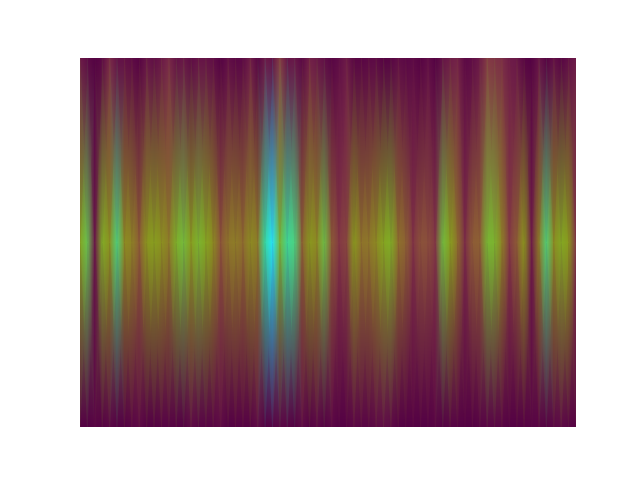

In [48]:
img = cv2.imread("/content/drive/MyDrive/psd_spectrogram/train/normal/spectrogram0.png")
img

array([[[107,  33,  69],
        [105,  23,  71],
        [103,  21,  71],
        ...,
        [105,  23,  71],
        [106,  24,  71],
        [107,  25,  71]],

       [[108,  36,  69],
        [105,  25,  71],
        [103,  23,  71],
        ...,
        [105,  24,  71],
        [106,  25,  71],
        [107,  26,  71]],

       [[108,  36,  69],
        [105,  25,  71],
        [104,  23,  71],
        ...,
        [105,  24,  71],
        [106,  25,  71],
        [108,  26,  71]],

       ...,

       [[ 88,  14,  66],
        [ 85,   4,  68],
        [ 85,   4,  68],
        ...,
        [ 88,   4,  68],
        [ 87,   4,  68],
        [ 89,   9,  66]],

       [[ 87,  13,  66],
        [ 85,   3,  68],
        [ 85,   3,  68],
        ...,
        [ 87,   4,  68],
        [ 86,   3,  68],
        [ 88,   8,  66]],

       [[ 87,  12,  67],
        [ 85,   2,  68],
        [ 85,   2,  68],
        ...,
        [ 87,   4,  68],
        [ 86,   3,  68],
        [ 88,   8,  66]]], dtype=uint8)
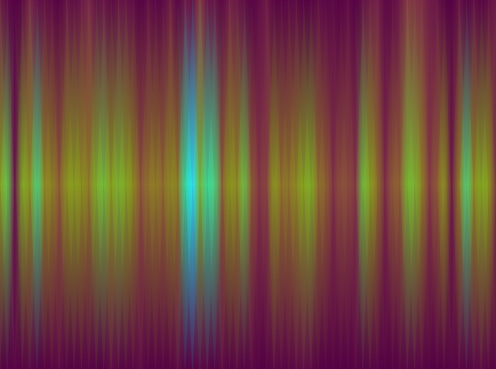

In [49]:
remove_white_border(img)

In [50]:
train_dir = "/content/drive/MyDrive/psd_spectrogram/train"
validation_dir = "/content/drive/MyDrive/psd_spectrogram/validation"
img_height, img_width = 224, 224
batch_size = 2

In [51]:
def preprocess_image(image):
    image = remove_white_border(image)
    image = cv2.resize(image, (img_height, img_width))
    return image

array([[[106,  27,  70],
        [101,  20,  71],
        [ 98,  15,  70],
        ...,
        [101,  19,  71],
        [104,  21,  71],
        [106,  24,  71]],

       [[106,  29,  70],
        [102,  21,  71],
        [ 98,  18,  70],
        ...,
        [102,  20,  71],
        [104,  22,  71],
        [107,  25,  71]],

       [[106,  31,  70],
        [102,  23,  71],
        [ 98,  19,  70],
        ...,
        [102,  20,  70],
        [104,  23,  70],
        [107,  26,  70]],

       ...,

       [[ 87,  10,  67],
        [ 86,   5,  68],
        [ 85,   5,  68],
        ...,
        [ 89,   6,  68],
        [ 88,   5,  68],
        [ 88,   7,  67]],

       [[ 86,   8,  67],
        [ 85,   4,  68],
        [ 85,   4,  68],
        ...,
        [ 89,   5,  68],
        [ 88,   4,  68],
        [ 88,   6,  67]],

       [[ 86,   6,  67],
        [ 85,   2,  68],
        [ 84,   2,  68],
        ...,
        [ 88,   5,  68],
        [ 87,   4,  68],
        [ 87,   5,  67]]], dtype=uint8)
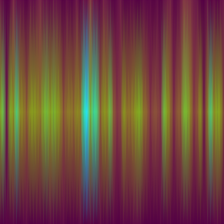

In [52]:
preprocess_image(img)

In [53]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=preprocess_image,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=preprocess_image
)

In [54]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 18 images belonging to 2 classes.
Found 9 images belonging to 2 classes.


In [55]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=1e-4),
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Epoch 1/20


<ipython-input-46-22405cda1f76>:16: RuntimeWarning: invalid value encountered in cast
  binary = np.uint8(binary)


9/9 [==============================] - 7s 631ms/step - loss: 0.6028 - accuracy: 0.6667 - val_loss: 0.7895 - val_accuracy: 0.6250
Epoch 2/20
9/9 [==============================] - 4s 435ms/step - loss: 0.5595 - accuracy: 0.7778 - val_loss: 0.5640 - val_accuracy: 0.7500
Epoch 3/20
9/9 [==============================] - 5s 572ms/step - loss: 0.5404 - accuracy: 0.7778 - val_loss: 0.7140 - val_accuracy: 0.6250
Epoch 4/20
9/9 [==============================] - 5s 494ms/step - loss: 0.5170 - accuracy: 0.7778 - val_loss: 0.7182 - val_accuracy: 0.6250
Epoch 5/20
9/9 [==============================] - 4s 449ms/step - loss: 0.4988 - accuracy: 0.7778 - val_loss: 0.6878 - val_accuracy: 0.6250
Epoch 6/20
9/9 [==============================] - 4s 487ms/step - loss: 0.4994 - accuracy: 0.7778 - val_loss: 0.5251 - val_accuracy: 0.7500
Epoch 7/20
9/9 [==============================] - 5s 538ms/step - loss: 0.4689 - accuracy: 0.7778 - val_loss: 0.5207 - val_accuracy: 0.7500
Epoch 8/20
9/9 [===============

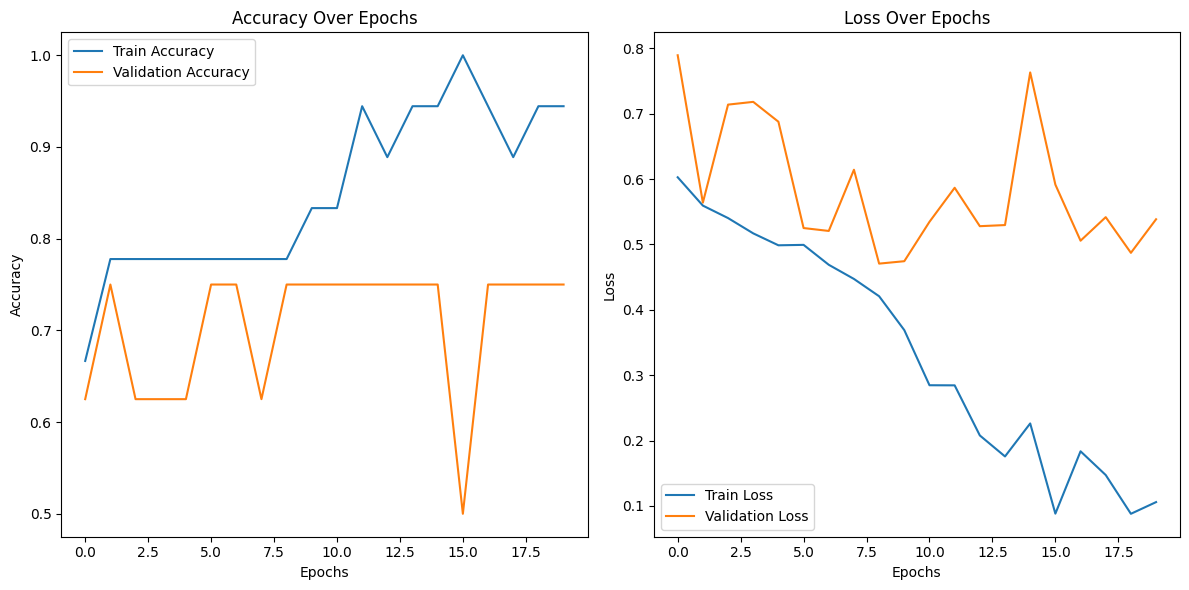

In [56]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage
plot_training_history(history)


In [57]:
test_loss, test_acc = model.evaluate(validation_generator, steps=validation_generator.samples)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

1/9 [==>...........................] - ETA: 1s - loss: 0.9779 - accuracy: 0.5000

<ipython-input-46-22405cda1f76>:16: RuntimeWarning: invalid value encountered in cast
  binary = np.uint8(binary)


4/9 [============>.................] - ETA: 0s - loss: 0.5268 - accuracy: 0.7500

9/9 [==============================] - 0s 41ms/step - loss: 0.4855 - accuracy: 0.7778
Test Loss: 0.48553022742271423
Test Accuracy: 0.7777777910232544


In [58]:
img = cv2.imread("spec_ex.png")
img = preprocess_image(img)
img = np.expand_dims(img, axis=0)
img.shape

(1, 224, 224, 3)

In [59]:
train_generator.class_indices

{'abnormal': 0, 'normal': 1}

In [60]:
predictions = model.predict(img)
predicted_class = int(np.round(predictions[0][0]))

# Display the predicted class
if predicted_class == 0:
    print("abnormal")
else:
    print("normal")

1/1 [==============================] - 0s 134ms/step
normal
